In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fnmatch
from itertools import chain

from img_utils import ImgUtils
from noised_image_datagen import NoisedImageDatagen
from unet import UNet

In [2]:
filenames = []
for dirpath, dirs, files in os.walk('Images'): 
  for filename in fnmatch.filter(files, '*.jpg'):
    filenames.append(os.path.join(dirpath, filename))

filenames = filenames[:1000] # only use first 100 images temporarily for quicker runtime

In [3]:
n_timesteps = 50
datagen = NoisedImageDatagen(filenames, n_timesteps=n_timesteps, noise_start=0.0001, noise_end=0.06)
batch = datagen[0]
print(batch[0].shape)
print(len(datagen))

(50, 64, 64, 3)
1000


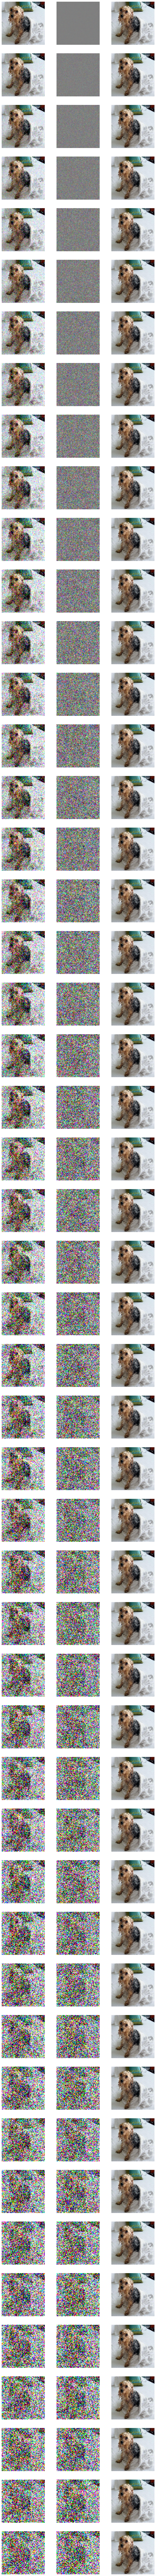

In [4]:
shown_imgs_X = [ImgUtils.unscale_img(img).clip(0,1) for img in batch[0]]
shown_imgs_y = [ImgUtils.unscale_img(img).clip(0,1) for img in batch[1]]
shown_imgs_recon = [ImgUtils.unscale_img(img1 + img2).clip(0,1) for img1, img2 in zip(batch[0], batch[1])]
ImgUtils.show_images(list(chain.from_iterable(zip(shown_imgs_X, shown_imgs_y, shown_imgs_recon))), cols=3)

In [5]:
unet = UNet.new()
unet.compile(optimizer="adam", loss=lambda hx, y: (y-hx)**2)
unet.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-13 10:06:58.690697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 10:06:58.690817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   448         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 16)   2320        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 16)   0           ['conv2d_1[0][0]']               
                                                                                              

In [6]:
hist = unet.fit(datagen, epochs=40)

Epoch 1/40


2022-11-13 10:06:59.021994: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 10:06:59.324586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 85s 84ms/step - loss: 0.2351
Epoch 2/40
1000/1000 [==============================] - 83s 83ms/step - loss: 0.2214
Epoch 3/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2190
Epoch 4/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2180
Epoch 5/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2170
Epoch 6/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2166
Epoch 7/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2165
Epoch 8/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2157
Epoch 9/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2157
Epoch 10/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2155
Epoch 11/40
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2154
Epoch 12/40
1000/1000 [==============================] - 84s 84ms/step - l

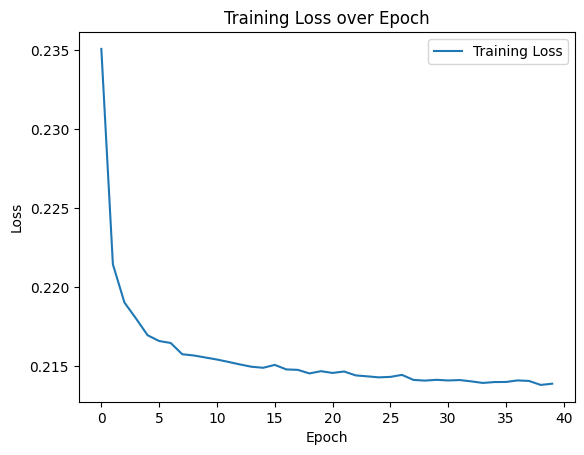

In [7]:
plt.plot(hist.history["loss"], label="Training Loss")
#plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epoch")
plt.show()

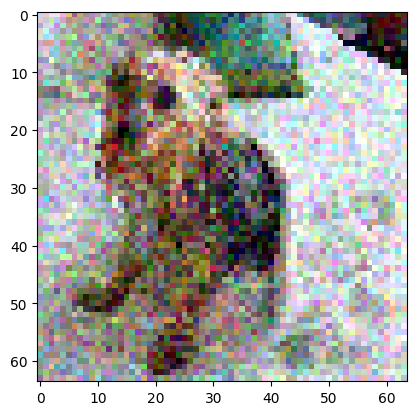

1/1 [==============================] - 0s 16ms/step


2022-11-13 11:02:54.444092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


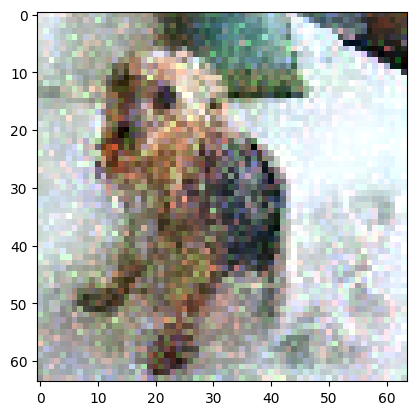

In [8]:
denoisee = batch[0][9]
plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

for i in range(n_timesteps * 5):
    noise_pred = unet.predict(np.array([denoisee]))[0]
    denoisee = denoisee + (1/n_timesteps) * noise_pred


plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

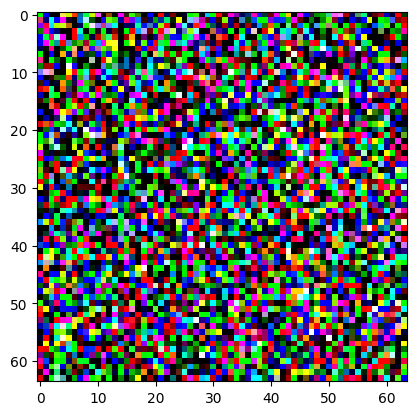

1/1 [==============================] - 0s 16ms/step


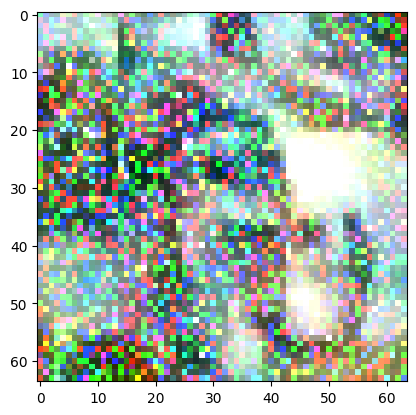

In [11]:
denoisee = np.random.randn(64, 64, 3) * 2 - 1
plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

for i in range(n_timesteps * 5):
    noise_pred = unet.predict(np.array([denoisee]))[0]
    denoisee = denoisee + (1/n_timesteps) * noise_pred


plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()